# Looking for particularities for app_domain 99b4c806 on the 28th

It was shown that app_domain 99b4c806 was much more successful on the 28th compared to any other days.
Below is how to look at some other field distributions for this app_domain on the 28th and other days.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
filename = '../data/train.csv'

In [2]:
df = pd.read_csv(filename, dtype={'id': str})

In [3]:
df['time'] = pd.to_datetime(df['hour'], format='%y%m%d%H')
df.set_index('time', inplace=True)

Only app_domain will be studied.

In [9]:
df = df[df.app_domain=='99b4c806']

Separate data on the 28th and the rest

In [26]:
by28ornot = df.groupby(df.index.day==28)
on28th = by28ornot.get_group(True)
not28th = by28ornot.get_group(False)

Plot the (normalized) distributions of some fields to look for differences.

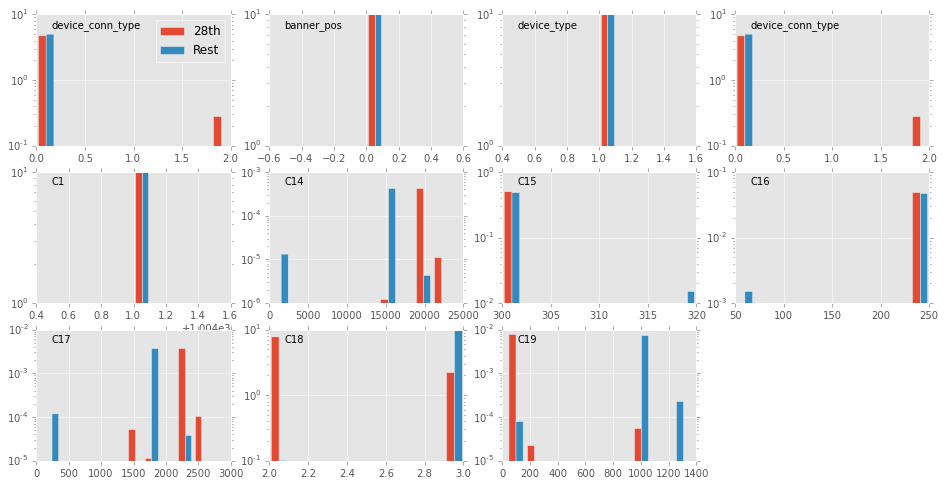

In [88]:
fields = ('device_conn_type', 'banner_pos', 'device_type', 'device_conn_type',
          'C1', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19')
fig_comp = plt.figure(figsize=(16,8))
for index, ifield in enumerate(fields):
    ax = plt.subplot(3,4,index+1)
    plt.hist([on28th[ifield], not28th[ifield]], label=['28th','Rest'],normed=True)
    plt.yscale('log')
    ax.text(0.08, 0.9, ifield,
        transform=ax.transAxes)
    if index == 0:
     _ = plt.legend(loc='best')

Obvious differences are seen for fields C14, C17, C18 & C19.